# Préparation des données

## Import des librairies

In [105]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sn
import statistics as stats
import scipy as sc

## CSV Train

### Import du CSV

In [106]:
df_train = pd.read_csv('csv/train.csv', header=0)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Etude des valeurs manquantes

In [107]:
df_train_len = len(df_train)
print('Taille du Dataset :',df_train_len)
for i in df_train.columns:
    s = pd.Series(df_train[i])
    nb = s.isna().sum()
    print(i, ' : ', nb, ' (', round(nb*100/df_train_len,1) ,'%)',sep='')

Taille du Dataset : 891
PassengerId : 0 (0.0%)
Survived : 0 (0.0%)
Pclass : 0 (0.0%)
Name : 0 (0.0%)
Sex : 0 (0.0%)
Age : 177 (19.9%)
SibSp : 0 (0.0%)
Parch : 0 (0.0%)
Ticket : 0 (0.0%)
Fare : 0 (0.0%)
Cabin : 687 (77.1%)
Embarked : 2 (0.2%)


### On efface la colonne Cabin qui a plus de 75% de valeurs vides

In [108]:
if 'Cabin' in df_train.columns:
    del df_train['Cabin']
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Après des questions en groupe, on a décider de comparer l'utilisation de la base de données en remplaçant les Ages manquant par la moyenne et si on supprime ces valeurs (différence de résultat entre lors du Machine Learning)

In [109]:
df_train = df_train.dropna(subset=['Embarked'])

df_train_mean = df_train
df_train_clean = df_train.dropna(subset=['Age'])

df_train_mean['Age'] = pd.Series(df_train['Age']).fillna(round(pd.Series(df_train['Age']).mean()))

In [110]:
df_train_mean_len = len(df_train_mean)
print('Taille du Dataset :',df_train_mean_len)
for i in df_train_mean.columns:
    s = pd.Series(df_train_mean[i])
    nb = s.isna().sum()
    print(i, ' : ', nb, ' (', round(nb*100/df_train_mean_len,1) ,'%)',sep='')

print("=====")

df_train_clean_len = len(df_train_clean)
print('Taille du Dataset :',df_train_clean_len)
for i in df_train_clean.columns:
    s = pd.Series(df_train_clean[i])
    nb = s.isna().sum()
    print(i, ' : ', nb, ' (', round(nb*100/df_train_clean_len,1) ,'%)',sep='')

Taille du Dataset : 889
PassengerId : 0 (0.0%)
Survived : 0 (0.0%)
Pclass : 0 (0.0%)
Name : 0 (0.0%)
Sex : 0 (0.0%)
Age : 0 (0.0%)
SibSp : 0 (0.0%)
Parch : 0 (0.0%)
Ticket : 0 (0.0%)
Fare : 0 (0.0%)
Embarked : 0 (0.0%)
=====
Taille du Dataset : 712
PassengerId : 0 (0.0%)
Survived : 0 (0.0%)
Pclass : 0 (0.0%)
Name : 0 (0.0%)
Sex : 0 (0.0%)
Age : 0 (0.0%)
SibSp : 0 (0.0%)
Parch : 0 (0.0%)
Ticket : 0 (0.0%)
Fare : 0 (0.0%)
Embarked : 0 (0.0%)


### Sauvegarde des fichiers dans des CSV pour des utilisations ulterieurs

In [111]:
df_train_clean.to_csv('csv/train_clean.csv',index=False)
df_train_mean.to_csv('csv/train_mean.csv',index=False)

### Matrices de correlations

CSV clean :

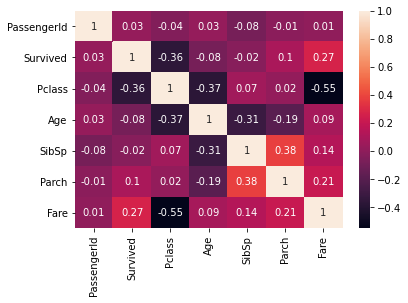

In [112]:
corrMatrixCln = round(df_train_clean.corr(),2)
sn.heatmap(corrMatrixCln, annot=True)
plt.pyplot.show()

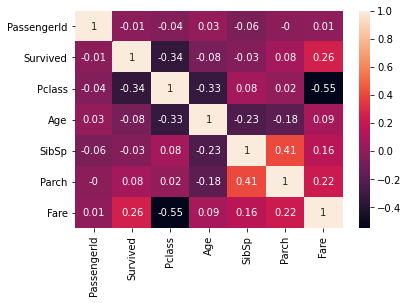

In [113]:
corrMatrixMean = round(df_train_mean.corr(),2)
sn.heatmap(corrMatrixMean, annot=True)
plt.pyplot.show()

# Exploration de données

## DataVis

Voir le lien : https://app.powerbi.com/groups/4351951c-e70b-4b95-a88c-7cc80f4f485f/reports/e1a8205d-c883-4efe-ab86-638d60b07933/ReportSection

## Test d'Hypothèses

### Femme et enfant d'abord

H0 - Enfant pas en priorité  
H1 - Enfant en priorité

alpha - 0.05

On récupère les données des enfants (Age < 18) et de savoir si ils ont survécus (Survived = 1)

In [114]:
df_enfant = df_train_clean[['Survived','Age']]
df_enfant = df_enfant[df_enfant.Age < 18]

In [115]:
df_enfant_survivant = df_enfant[df_enfant.Survived == 1]

In [116]:
df_enfant['Age'].describe()

count    113.000000
mean       9.041327
std        6.030408
min        0.420000
25%        3.000000
50%        9.000000
75%       16.000000
max       17.000000
Name: Age, dtype: float64

In [117]:
df_enfant_survivant['Age'].describe()

count    61.000000
mean      7.888033
std       6.129831
min       0.420000
25%       3.000000
50%       5.000000
75%      15.000000
max      17.000000
Name: Age, dtype: float64